In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import copy
import math
import sklearn
from collections import defaultdict, Counter

In [58]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB

In [3]:
import warnings

# ignore future warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
def minmaxNormalisation(data):
    features = data
    original_index = features.index
    features_header = features.columns
    scaler = MinMaxScaler()
    features_normalized = scaler.fit_transform(features.values)
    features_normalized = pd.DataFrame(features_normalized,index = original_index,columns = features_header) 
    return features_normalized

In [5]:
def scalarNormalisation(data):
    features = data
    original_index = features.index
    features_header = features.columns
    scaler =  StandardScaler()
    features_normalized = scaler.fit_transform(features.values)
    features_normalized = pd.DataFrame(features_normalized,index = original_index,columns = features_header)xs
    return features_normalized

In [188]:
# This function add the word embeddings or tfidf to the dataset and removes the comments

def preprocess(train_data,features):
    features = features.drop(features.columns[0],axis=1) 

    return features

In [189]:
#Train dataset
original_data_train = pd.read_csv("clinicalDataset/TRAIN.csv")
tfidf_comments_train = pd.read_csv("clinicalDataset/TFIDF_TRAIN.csv")
word_embedding_comment_train = pd.read_csv("clinicalDataset/384EMBEDDINGS_TRAIN.csv")
train_labels = original_data_train["rating"]
tfidf_train = preprocess(original_data_train,tfidf_comments_train)
tfidf_train_normalised = scalarNormalisation(tfidf_train)
word_embeddings_train = preprocess(original_data_train,word_embedding_comment_train)
word_embeddings_train_normalised = scalarNormalisation(word_embeddings_train)
tfidf_train_normalised_mmn = minmaxNormalisation(tfidf_train)
word_embeddings_train_normalised_mmn = minmaxNormalisation(word_embeddings_train)

#Validation dataset
original_data_validation = pd.read_csv("clinicalDataset/VALIDATION.csv")
tfidf_comments_validation = pd.read_csv("clinicalDataset/TFIDF_VALIDATION.csv")
word_embedding_comment_validation = pd.read_csv("clinicalDataset/384EMBEDDINGS_VALIDATION.csv")
validation_labels = original_data_validation["rating"]
tfidf_validation = preprocess(original_data_validation,tfidf_comments_validation)
tfidf_validation_normalised = scalarNormalisation(tfidf_validation)
word_embeddings_validation = preprocess(original_data_validation,word_embedding_comment_validation)
word_embeddings_validation_normalised = scalarNormalisation(word_embeddings_validation)
tfidf_validation_normalised_mmn = minmaxNormalisation(tfidf_validation)
word_embeddings_validation_normalised_mmn = minmaxNormalisation(word_embeddings_validation)


In [35]:
def Weighted_Random(train_data_features,test_data_features,train_data_labels,test_data_labels):   
    weighted_random = DummyClassifier(strategy="stratified")
    weighted_random.fit(train_data_features, train_data_labels)
    weighted_random_predicted = weighted_random.predict(test_data_features)
    predicted_series = pd.Series(weighted_random_predicted, name='predicted')
    accuracy = accuracy_score(test_data_labels, weighted_random_predicted)
    report = classification_report(test_data_labels, predicted_series, target_names=['-1','1'],zero_division=1)
    return accuracy,report

In [138]:
weighted_accuracy_tfidf,Weighted_random_report_tfidf = Weighted_Random(tfidf_train_normalised,tfidf_validation_normalised,train_labels,validation_labels)
print("Weighted accuracy when we use TFIDF:",weighted_accuracy_tfidf)

weighted_accuracy_word_embeddings,Weighted_random_report_word_embeddings = Weighted_Random(word_embeddings_train_normalised,word_embeddings_validation_normalised,train_labels,validation_labels)
print("Weighted accuracy when we use word embeddings:",weighted_accuracy_word_embeddings)

Weighted accuracy when we use TFIDF: 0.6023636363636363
Weighted accuracy when we use word embeddings: 0.6081818181818182


In [20]:
def performGaussianNaiveBayes(train_data_features,train_data_labels,test_data_features,test_data_labels):
        
    gnb = GaussianNB()
    gnb.fit(train_data_features, train_data_labels)
    test_predicted = gnb.predict(test_data_features)
    accuracy = accuracy_score(test_data_labels, test_predicted)
    report = classification_report(test_data_labels, test_predicted, target_names=['-1','1'],zero_division=1)
    micro = precision_score(test_data_labels, test_predicted, average='micro',zero_division=1)
    macro = precision_score(test_data_labels, test_predicted, average='macro',zero_division=1)
    return accuracy,report,micro,macro

def performBernoulliNaiveBayes(train_data_features,train_data_labels,test_data_features,test_data_labels):
    bnb = BernoulliNB()
    bnb.fit(train_data_features, train_data_labels)
    test_predicted = bnb.predict(test_data_features)
    accuracy = accuracy_score(test_data_labels, test_predicted)
    report = classification_report(test_data_labels, test_predicted, target_names=['-1','1'],zero_division=1)
    micro = precision_score(test_data_labels, test_predicted, average='micro',zero_division=1)
    macro = precision_score(test_data_labels, test_predicted, average='macro',zero_division=1)
    return accuracy,report,micro,macro

def performMultinomialNaiveBayes(train_data_features,train_data_labels,test_data_features,test_data_labels):
    mnb = MultinomialNB()
    mnb.fit(train_data_features, train_data_labels)
    test_predicted = mnb.predict(test_data_features)
    accuracy = accuracy_score(test_data_labels, test_predicted)
    report = classification_report(test_data_labels, test_predicted, target_names=['-1','1'],zero_division=1)
    micro = precision_score(test_data_labels, test_predicted, average='micro',zero_division=1)
    macro = precision_score(test_data_labels, test_predicted, average='macro',zero_division=1)
    return accuracy,report,micro,macro

In [157]:
gnb_accuracy_tfidf,gnb_report_tfidf,gnb_micro_tfidf,gnb_macro_tfidf = performGaussianNaiveBayes(tfidf_train_normalised,train_labels,tfidf_validation_normalised,validation_labels)
gnb_accuracy_word_embedding,gnb_report_word_embedding,gnb_micro_word_embedding,gnb_macro_word_embedding = performGaussianNaiveBayes(word_embeddings_train_normalised,train_labels,word_embeddings_validation_normalised,validation_labels)

bnb_accuracy_tfidf,bnb_report_tfidf,bnb_micro_tfidf,bnb_macro_tfidf = performBernoulliNaiveBayes(tfidf_train_normalised,train_labels,tfidf_validation_normalised,validation_labels)
bnb_accuracy_word_embedding,bnb_report_word_embedding,bnb_micro_word_embedding,bnb_macro_word_embedding = performBernoulliNaiveBayes(word_embeddings_train_normalised,train_labels,word_embeddings_validation_normalised,validation_labels)

mmn_accuracy_tfidf,mmn_report_tfidf,mmn_micro_tfidf,mmn_macro_tfidf = performMultinomialNaiveBayes(tfidf_train_normalised_mmn,train_labels,tfidf_validation_normalised_mmn,validation_labels)
mmn_accuracy_word_embedding,mmn_report_word_embedding,mmn_micro_word_embedding,mmn_macro_word_embedding = performMultinomialNaiveBayes(word_embeddings_train_normalised_mmn,train_labels,word_embeddings_validation_normalised_mmn,validation_labels)

print("Bernoulli accuracy when we use tfidf:",bnb_accuracy_tfidf.round(3))
print("Bernoulli accuracy when we use word embeddings:",bnb_accuracy_word_embedding.round(3))
print("\n")
print("Gaussian accuracy when we use tfidf:",gnb_accuracy_tfidf.round(3))
print("Gaussian accuracy when we use word embeddings:",gnb_accuracy_word_embedding.round(3))
print("\n")
print("Multinomial accuracy when we use tfidf:",mnb_accuracy_tfidf.round(3))
print("Multinomial accuracy when we use word embeddings:",mnb_accuracy_word_embedding.round(3))

print("multinomial naive bayes report for tfidf:")
print(mmn_report_tfidf)

print("multinomial naive bayes report for word embeddings:")
print(mmn_report_tfidf)
                                                            

Bernoulli accuracy when we use tfidf: 0.867
Bernoulli accuracy when we use word embeddings: 0.861


Gaussian accuracy when we use tfidf: 0.855
Gaussian accuracy when we use word embeddings: 0.864


Multinomial accuracy when we use tfidf: 0.885
Multinomial accuracy when we use word embeddings: 0.856
multinomial naive bayes report for tfidf:
              precision    recall  f1-score   support

          -1       0.82      0.72      0.77      1462
           1       0.90      0.94      0.92      4038

    accuracy                           0.88      5500
   macro avg       0.86      0.83      0.85      5500
weighted avg       0.88      0.88      0.88      5500

multinomial naive bayes report for word embeddings:
              precision    recall  f1-score   support

          -1       0.82      0.72      0.77      1462
           1       0.90      0.94      0.92      4038

    accuracy                           0.88      5500
   macro avg       0.86      0.83      0.85      5500
weighte

In [130]:
def logisticRegression(train_data_features,train_data_labels,test_data_features,test_data_labels,iters):
    logistic_regression_model = LogisticRegression(max_iter=iters)
    logistic_regression_model.fit(train_data_features, train_data_labels)
    iterations_to_converge = logistic_regression_model.n_iter_[0] 
    test_predicted = logistic_regression_model.predict(test_data_features)
    accuracy = accuracy_score(test_data_labels, test_predicted)
    report = classification_report(test_data_labels, test_predicted, target_names=['-1','1'],zero_division=1)
    micro = precision_score(test_data_labels, test_predicted, average='micro',zero_division=1)
    macro = precision_score(test_data_labels, test_predicted, average='macro',zero_division=1)
    return accuracy,report,micro,macro,iterations_to_converge

In [151]:
logistic_regression_model_accuracy_tfidf,logistic_regression_model_report_tfidf,micro_tfidf,macro_tfidf,tfidf_iterations = logisticRegression(tfidf_train_normalised,train_labels,tfidf_validation_normalised,validation_labels,100)
logistic_regression_model_accuracy_word_embedding,logistic_regression_model_report_word_embedding,micro_word_embedding,macro_word_embedding,word_embedding_iteration = logisticRegression(word_embeddings_train_normalised,train_labels,word_embeddings_validation_normalised,validation_labels,250)
print("Logistic regression accuracy when we use tfidf: {} and iterations needed were: {}".format(logistic_regression_model_accuracy_tfidf,tfidf_iterations))
print("Logistic regression accuracy when we use word embeddings: {} and iterations needed were: {}".format(logistic_regression_model_accuracy_word_embedding,word_embedding_iteration))

print("logistic regression report for tfidf:")
print(logistic_regression_model_report_tfidf)

print("logistic regression report for word embeddings:")
print(logistic_regression_model_report_word_embedding)
                       

Logistic regression accuracy when we use tfidf: 0.904 and iterations needed were: 36
Logistic regression accuracy when we use word embeddings: 0.924 and iterations needed were: 236
logistic regression report for tfidf:
              precision    recall  f1-score   support

          -1       0.79      0.86      0.83      1462
           1       0.95      0.92      0.93      4038

    accuracy                           0.90      5500
   macro avg       0.87      0.89      0.88      5500
weighted avg       0.91      0.90      0.91      5500

logistic regression report for word embeddings:
              precision    recall  f1-score   support

          -1       0.86      0.85      0.86      1462
           1       0.95      0.95      0.95      4038

    accuracy                           0.92      5500
   macro avg       0.90      0.90      0.90      5500
weighted avg       0.92      0.92      0.92      5500



In [65]:
def chiSquare(train_data_features,train_data_labels,nf):
    chi = SelectKBest(score_func=chi2, k=nf)
    selected_features = chi.fit_transform(train_data_features, train_data_labels)

    # Get the indices of the selected features
    selected_feature_indices = chi.get_support(indices=True)
    
    # Get the names of the selected features
    selected_features_name = train_data_features.columns[selected_feature_indices]
    
    return selected_features_name
    

In [124]:
def findBestK(tfidf_train,train_labels):
    best_accuracy = 0
    best_k = 0
    epsilon = 1e-4*2
    original_accuracy = 0
    k_array = []
    accuracy_array = []

    for k in range(500, 0, -10):
        accuracy_k = []
        for i in range(10):
            train_data_features,test_data_features,train_data_labels,test_data_labels = train_test_split(tfidf_train,train_labels ,test_size = 0.2, random_state = i)
            selected_feature_name = chiSquare(train_data_features,train_data_labels,nf=k)
            train_data_new_features = train_data_features[selected_feature_name]
            Chi2_train = train_data_new_features
            Chi2_normalised_train = minmaxNormalisation(Chi2_train)

            test_data_features_new_features = test_data_features[selected_feature_name]
            Chi2_validation = test_data_features_new_features
            Chi2_normalised_validation = minmaxNormalisation(Chi2_validation)

            mnb_accuracy_chi2,mnb_report_chi2,micro_chi2,macro_chi2 = performMultinomialNaiveBayes(Chi2_normalised_train,train_data_labels,Chi2_normalised_validation,test_data_labels)
            accuracy_k.append(mnb_accuracy_chi2)
        if k == 500:
            original_accuracy = np.mean(accuracy_k)
        if original_accuracy - np.mean(accuracy_k) < epsilon:
            k_array.append(k)
            accuracy_array.append(np.mean(accuracy_k))
    best_k_chi2_cross = min(k_array)
    k_index = k_array.index(best_k_chi2_cross)
    return best_k_chi2_cross


In [125]:
best_k = findBestK(tfidf_train,train_labels)
print(best_k)

250


In [152]:
selected_feature_name = chiSquare(tfidf_train,train_labels,250)
tfidf_train_new_features = tfidf_train[selected_feature_name]
tfidf_Chi2_train = tfidf_train_new_features
tfidf_Chi2_normalised_train = minmaxNormalisation(tfidf_Chi2_train)
tfidf_validation_new_features = tfidf_validation[selected_feature_name]
tfidf_Chi2_validation = tfidf_validation_new_features
tfidf_Chi2_normalised_validation = minmaxNormalisation(tfidf_Chi2_validation)
mnb_accuracy_tfidf_chi2,mnb_report_tfidf_chi2,mnb_micro_tfidf_chi2,mnb_macro_tfidf_chi2 = performMultinomialNaiveBayes(tfidf_Chi2_normalised_train,train_labels,tfidf_Chi2_normalised_validation,validation_labels)
print("Multinomial accuracy when we use tfidf and chi square for feature selection using cross validation method is:",mnb_accuracy_tfidf_chi2)
print("multinomial naive bayes report for tfidf using iterative approach:")
print(mnb_report_tfidf_chi2)

Multinomial accuracy when we use tfidf and chi square for feature selection using cross validation method is: 0.8796363636363637
multinomial naive bayes report for tfidf using iterative approach:
              precision    recall  f1-score   support

          -1       0.82      0.70      0.76      1462
           1       0.90      0.94      0.92      4038

    accuracy                           0.88      5500
   macro avg       0.86      0.82      0.84      5500
weighted avg       0.88      0.88      0.88      5500



best k is : 430
Multinomial accuracy when we use tfidf and chi square for feature selection is: 0.8845454545454545


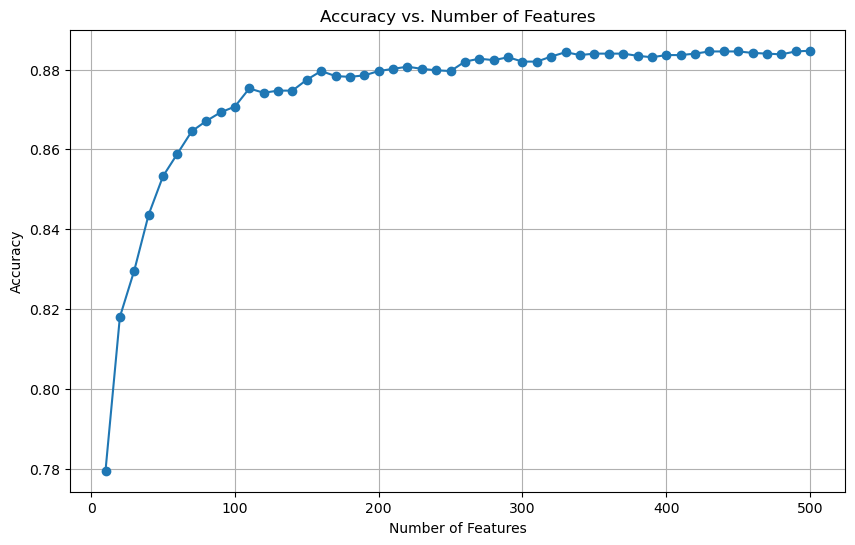

In [128]:
original_accuracy = 0
k_array = []
accuracy_array = []
accuracies = []
epsilon = 1e-4*2

feature_counts = range(500, 0, -10)
for k in feature_counts:
    selected_feature_name = chiSquare(tfidf_train,train_labels,k)
    tfidf_train_new_features = tfidf_train[selected_feature_name]
    tfidf_Chi2_train = tfidf_train_new_features
    tfidf_Chi2_normalised_train = minmaxNormalisation(tfidf_Chi2_train)
    tfidf_validation_new_features = tfidf_validation[selected_feature_name]
    tfidf_Chi2_validation = tfidf_validation_new_features
    tfidf_Chi2_normalised_validation = minmaxNormalisation(tfidf_Chi2_validation)
    mnb_accuracy_tfidf_chi2,mnb_report_tfidf_chi2,mnb_micro_tfidf_chi2,mnb_macro_tfidf_chi2 = performMultinomialNaiveBayes(tfidf_Chi2_normalised_train,train_labels,tfidf_Chi2_normalised_validation,validation_labels)
    accuracies.append(mnb_accuracy_tfidf_chi2)
    if k == 500:
        original_accuracy = mnb_accuracy_tfidf_chi2
    if original_accuracy - mnb_accuracy_tfidf_chi2 < epsilon:
        k_array.append(k)
        accuracy_array.append(mnb_accuracy_tfidf_chi2)

best_k_chi2 = min(k_array)
k_index = k_array.index(best_k_chi2)

print("best k is :",best_k_chi2)
print("Multinomial accuracy when we use tfidf and chi square for feature selection is:",accuracy_array[k_index])

plt.figure(figsize=(10, 6))
plt.plot(feature_counts, accuracies, marker='o', linestyle='-')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Features')
plt.grid(True)
plt.show()
    
    

In [140]:
selected_feature_name = chiSquare(tfidf_train,train_labels,best_k_chi2)

tfidf_train_new_features = tfidf_train[selected_feature_name]
tfidf_Chi2_train = tfidf_train_new_features
tfidf_Chi2_normalised_train = scalarNormalisation(tfidf_Chi2_train)
tfidf_validation_new_features = tfidf_validation[selected_feature_name]
tfidf_Chi2_validation = tfidf_validation_new_features
tfidf_Chi2_normalised_validation = scalarNormalisation(tfidf_Chi2_validation)
tfidf_Chi2_normalised_train_mnb = minmaxNormalisation(tfidf_Chi2_train)
tfidf_Chi2_normalised_validation_mnb = minmaxNormalisation(tfidf_Chi2_validation)

gnb_accuracy_tfidf_chi2,gnb_report_tfidf_chi2,gnb_micro_tfidf_chi2,gnb_macro_tfidf_chi2 = performGaussianNaiveBayes(tfidf_Chi2_normalised_train,train_labels,tfidf_Chi2_normalised_validation,validation_labels)

bnb_accuracy_tfidf_chi2,bnb_report_tfidf_chi2,bnb_micro_tfidf_chi2,bnb_macro_tfidf_chi2 = performBernoulliNaiveBayes(tfidf_Chi2_normalised_train,train_labels,tfidf_Chi2_normalised_validation,validation_labels)

mnb_accuracy_tfidf_chi2,mnb_report_tfidf_chi2,mnb_micro_tfidf_chi2,mnb_macro_tfidf_chi2 = performMultinomialNaiveBayes(tfidf_Chi2_normalised_train_mnb,train_labels,tfidf_Chi2_normalised_validation_mnb,validation_labels)
    
print("Gaussian accuracy when we use tfidf and chi square for 430 feature selection is:",gnb_accuracy_tfidf_chi2.round(3))
print("Bernoulli accuracy when we use tfidf and chi square for 430 feature selection is:",bnb_accuracy_tfidf_chi2.round(3))
print("Multinomial accuracy when we use tfidf and chi square for 430 feature selection is:",mnb_accuracy_tfidf_chi2.round(3))
print("\n")
print("Gaussian accuracy when we use tfidf before selection:",gnb_accuracy_tfidf.round(3))
print("Bernoulli accuracy when we use tfidf before selection:",bnb_accuracy_tfidf.round(3))
print("Multinomial accuracy when we use tfidf before selection:",mnb_accuracy_tfidf.round(3))

Gaussian accuracy when we use tfidf and chi square for 430 feature selection is: 0.857
Bernoulli accuracy when we use tfidf and chi square for 430 feature selection is: 0.876
Multinomial accuracy when we use tfidf and chi square for 430 feature selection is: 0.88


Gaussian accuracy when we use tfidf before selection: 0.855
Bernoulli accuracy when we use tfidf before selection: 0.867
Multinomial accuracy when we use tfidf before selection: 0.885


best k is : 200
Logistic Regression accuracy when we use tfidf and chi square for feature selection is: 0.9041818181818182


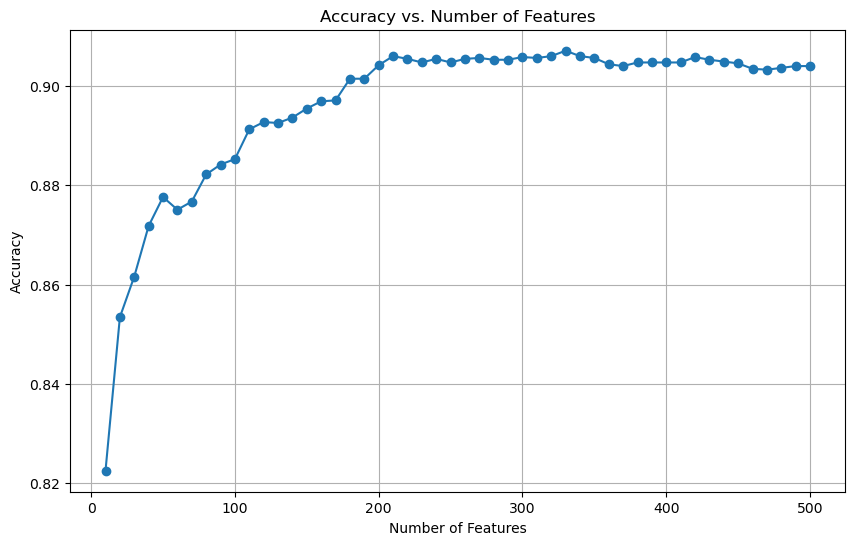

In [133]:
original_accuracy = 0
k_array = []
accuracy_array = []
accuracies = []
epsilon = 1e-4*2

feature_counts = range(500, 0, -10)
for k in feature_counts:
    selected_feature_name = chiSquare(tfidf_train,train_labels,k)
    tfidf_train_new_features = tfidf_train[selected_feature_name]
    tfidf_Chi2_train = tfidf_train_new_features
    tfidf_Chi2_normalised_train = scalarNormalisation(tfidf_Chi2_train)
    tfidf_validation_new_features = tfidf_validation[selected_feature_name]
    tfidf_Chi2_validation = tfidf_validation_new_features
    tfidf_Chi2_normalised_validation = scalarNormalisation(tfidf_Chi2_validation)
    lr_accuracy_tfidf_chi2,lr_report_tfidf_chi2,lr_micro_tfidf_chi2,lr_macro_tfidf_chi2,iteration_chi2 = logisticRegression(tfidf_Chi2_normalised_train,train_labels,tfidf_Chi2_normalised_validation,validation_labels,100)
    accuracies.append(lr_accuracy_tfidf_chi2)
    if k == 500:
        original_accuracy = lr_accuracy_tfidf_chi2
    if original_accuracy - lr_accuracy_tfidf_chi2 < epsilon:
        k_array.append(k)
        accuracy_array.append(lr_accuracy_tfidf_chi2)

best_k_chi2 = min(k_array)
k_index = k_array.index(best_k_chi2)

print("best k is :",best_k_chi2)
print("Logistic Regression accuracy when we use tfidf and chi square for feature selection is:",accuracy_array[k_index])

plt.figure(figsize=(10, 6))
plt.plot(feature_counts, accuracies, marker='o', linestyle='-')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Features')
plt.grid(True)
plt.show()

In [153]:
selected_feature_name = chiSquare(tfidf_train,train_labels,200)
tfidf_train_new_features = tfidf_train[selected_feature_name]
tfidf_Chi2_train = tfidf_train_new_features
tfidf_Chi2_normalised_train = scalarNormalisation(tfidf_Chi2_train)
tfidf_validation_new_features = tfidf_validation[selected_feature_name]
tfidf_Chi2_validation = tfidf_validation_new_features
tfidf_Chi2_normalised_validation = scalarNormalisation(tfidf_Chi2_validation)
lr_accuracy_tfidf_chi2,lr_report_tfidf_chi2,lr_micro_tfidf_chi2,lr_macro_tfidf_chi2,iteration_chi2 = logisticRegression(tfidf_Chi2_normalised_train,train_labels,tfidf_Chi2_normalised_validation,validation_labels,100)

print("Logistic regression accuracy when we use tfidf: {} and iterations needed were: {}".format(lr_accuracy_tfidf_chi2,iteration_chi2))

print("logistic regression report for tfidf:")
print(lr_report_tfidf_chi2)


Logistic regression accuracy when we use tfidf: 0.9041818181818182 and iterations needed were: 37
logistic regression report for tfidf:
              precision    recall  f1-score   support

          -1       0.79      0.87      0.83      1462
           1       0.95      0.92      0.93      4038

    accuracy                           0.90      5500
   macro avg       0.87      0.89      0.88      5500
weighted avg       0.91      0.90      0.91      5500



In [142]:
def mutualInformation(train_data_features,train_data_labels,k):
    
    selector = SelectKBest(score_func=mutual_info_classif, k=k) 
    features_selected = selector.fit_transform(train_data_features, train_data_labels)
    selected_feature_indices = selector.get_support(indices=True)
    selected_feature_names = train_data_features.columns[selected_feature_indices]
    
    return selected_feature_names

best k is : 500
Multinomial accuracy when we use tfidf and mutual information for feature selection is: 0.885


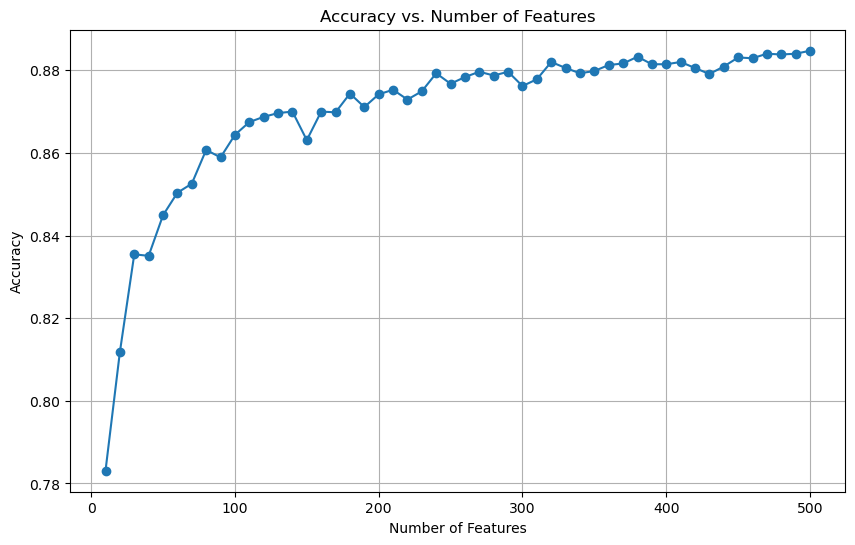

In [154]:
original_accuracy = 0
k_array = []
accuracy_array = []
accuracies = []
epsilon = 1e-4*2

feature_counts = range(500, 0, -10)
for k in feature_counts:
    selected_feature_name = mutualInformation(tfidf_train,train_labels,k)
    tfidf_train_new_features = tfidf_train[selected_feature_name]
    tfidf_mi_train = tfidf_train_new_features
    tfidf_mi_normalised_train = minmaxNormalisation(tfidf_mi_train)
    tfidf_validation_new_features = tfidf_validation[selected_feature_name]
    tfidf_mi_validation = tfidf_validation_new_features
    tfidf_mi_normalised_validation = minmaxNormalisation(tfidf_mi_validation)
    mnb_accuracy_tfidf_mi,mnb_report_tfidf_mi,micro_tfidf_mi,macro_tfidf_mi = performMultinomialNaiveBayes(tfidf_mi_normalised_train,train_labels,tfidf_mi_normalised_validation,validation_labels)
    accuracies.append(mnb_accuracy_tfidf_mi)
    if k == 500:
        original_accuracy = mnb_accuracy_tfidf_mi
    if original_accuracy - mnb_accuracy_tfidf_mi < epsilon:
        k_array.append(k)
        accuracy_array.append(mnb_accuracy_tfidf_mi)

best_k_mi = min(k_array)
k_index = k_array.index(best_k_mi)

print("best k is :",best_k_mi)
print("Multinomial accuracy when we use tfidf and mutual information for feature selection is:",accuracy_array[k_index].round(3))

plt.figure(figsize=(10, 6))
plt.plot(feature_counts, accuracies, marker='o', linestyle='-')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Features')
plt.grid(True)
plt.show()

In [174]:
#Test dataset
original_data_test = pd.read_csv("clinicalDataset/TEST_NO_LABELS.csv")
tfidf_comments_test = pd.read_csv("clinicalDataset/TFIDF_TEST.csv")
word_embedding_comment_test = pd.read_csv("clinicalDataset/384EMBEDDINGS_TEST.csv")
tfidf_test = preprocess(original_data_test,tfidf_comments_test)
tfidf_test_normalised = scalarNormalisation(tfidf_test)
word_embeddings_test = preprocess(original_data_test,word_embedding_comment_test)
word_embeddings_test_normalised = scalarNormalisation(word_embeddings_test)
logistic_regression_model = LogisticRegression(max_iter=300)
logistic_regression_model.fit(word_embeddings_train_normalised, train_labels)
test_predicted = logistic_regression_model.predict(word_embeddings_test_normalised)
result_df = pd.DataFrame({'rating': test_predicted})
result_df['id'] = range(len(test_predicted))
result_df.set_index('id', inplace=True)
result_df.to_csv('predicted_results_word.csv')